# Systèmes Linéaires

**Basile Marchand** --- Mines ParisTech

## Résolution de systèmes linéaires : Quel intérêt  ?  

### Les systèmes linéaires : incontournables

En mécanique numérique (non-)linéaire la résolution de systèmes linéaires est impérative  

Pour un comportement *linéaire* :

$$ \mathbf{K}\cdot \mathbf{U} = \mathbf{F}_{ext} $$

où $\mathbf{K}\in\mathbb{R}^{n_{dof}\times n_{dof}}$   

Pour un comportement *non-linéaire* :  

$$ \mathbf{R}( \mathbf{\Delta U} ) = \mathbf{F}_{int} + \mathbf{F}_{ext} = \mathbf{0} $$

En introduisant un algorithme de Newton ce problème se ramène à :  

$$ \mathbf{\Delta U}^{(k+1)} =  \mathbf{\Delta U}^{(k)} +  \mathbf{\delta U} $$

avec

$$ \mathcal{J}(\mathbf{R}( \mathbf{\Delta U}^{(k)} ) ) \mathbf{\delta U} = - R(\mathbf{\Delta U}^{(k)} ) $$

### Notation pour la suite 

Dans toute la suite du cours on cherchera à résoudre le système linéaire :

$$ \mathbf{A}\cdot \mathbf{x} = \mathbf{b} $$

Avec :
* La matrice $\mathbf{A}\in \mathbb{R}^{n \times n}$
* Le second membre $\mathbf{b} \in\mathbb{R}^{n}$
* Le vecteur d'inconnues $\mathbf{x} \in \mathbb{R}^{n}$


### Les deux classes de méthodes 

Pour résoudre un système linéaire

$$\mathbf{A}\cdot \mathbf{x} = \mathbf{b}$$

Il existe deux grandes classes de méthodes :
1. Les méthodes dites **directes**
2. Les méthodes dites **itératives**


Quelle différence ?  

Avec les méthodes directs on calcul une solution **exacte** tandis qu'avec des méthodes itératives on va construire une solution **approchée** 

## Quelques méthodes directes

### Inverse et factorisation
On note souvent :

$$ \mathbf{x} = \mathbf{A}^{-1} \cdot \mathbf{b} $$

Mais dans la pratique on ne calcul <span style="color:red"> jamais </span> la matrice inverse $\mathbf{A}^{-1}$.

Alors comment on fait ?

> On calcul une décomposition de $A$ permettant une résolution rapide

Pour cela on se ramène à des matrices **triangulaires**  


### Les matrices triangulaires 


$$ 
\mathbf{A} = \left[\begin{array}{cccc}A_{11} & A_{12} & A_{13} & A_{14} \\ 0 & A_{22} & A_{23} & A_{24} \\ 0 & 0 & A_{33} & A_{34} \\ 0 & 0 & 0 & A_{44} \end{array}\right] \cdot
\left[\begin{array}{c} x_{1} \\ x_{2} \\ x_{3} \\ x_{4} \end{array}\right]=\left[\begin{array}{c}
b_{1} \\
b_{2} \\
b_{3} \\
b_{4} \end{array}\right]
$$


On calcul $x_4 = \dfrac{b_4}{A_{44}}$ ($x_N$ dans le cas général), puis $x_3$ ... jusqu'à $x_1$.  
C'est ce qu'on appelle l'étape de **remontée** (backward)  

$$ x_i = \frac{1}{A_{ii}} \left( b_i - \sum_{j=i+1}^{N} A_{ij} \cdot x_i \right)$$    

In [6]:
def resolution_triangulaire_superieure(matrice, vecteur):
    sol = np.zeros_like(vecteur)
    n = vecteur.shape[0]
    for i in range(n-1,-1,-1):
        sol[i] = vecteur[i]
        for j in range(i+1,n):
            sol[i] -= matrice[i,j]*sol[j]
        sol[i] /= matrice[i,i]
    return sol

### Élimination de Gauss

$$ \mathbf{A} \cdot \mathbf{x} = \mathbf{b} $$

**Règles :**  

1. On peut permuter deux lignes de $\mathbf{A}$ sans changer la solution $\mathbf{x}$, en effectuant la même permutation de ligne sur $\mathbf{B}$.
2. On peut modifier une ligne de $\mathbf{A}$ avec une combinaison linéaire d'autres lignes de $\mathbf{A}$ sans changer la solution $\mathbf{x}$, en effectuant la même com\
binaison de lignes sur $\mathbf{B}$
3. On peut permuter deux colonnes de $\mathbf{A}$ si l'on permute les lignes correspondantes de $\mathbf{x}$. Attention, il faut reconstruire la solution avec la numérotati\
on d'origine.


On va donc transformer le système

$$ \mathbf{A}\cdot\mathbf{x} = \mathbf{b} $$

en un autre système

$$ \mathbf{\tilde{A}} \cdot \mathbf{x} = \mathbf{\tilde{b}} $$

où $\mathbf{\tilde{A}}\in\mathbb{R}^N$ est une matrice **triangulaire supérieure**


In [1]:
def pivot_gauss(lhs, rhs):
    n = rhs.shape[0]
    for i in range(0,n):
        for j in range(i+1,n):
            coef = lhs[j,i]/lhs[i,i]
            lhs[j,:] -= coef * lhs[i,:]
            rhs[j,0] -= coef * rhs[i,0]


Défauts :

* Approche coûteuse
* Ne peux servir que pour un seul second membre, i.e. n'est pas réutilisable


### La décomposition LU (Lower Upper)
Utilisée pour les matrices $\mathbf{A}$ carrées quelconques  
Le principe : trouver $\mathbf{L}$ et $\mathbf{U}$ respectivement des matrices triangulaires inférieures, supérieures telles que :

$$ \mathbf{A} = \mathbf{L}\cdot \mathbf{U} $$

Quel intérêt ?

$$\mathbf{A}\cdot \mathbf{x} = \mathbf{b} \; \Rightarrow \; \mathbf{L}\cdot\mathbf{U} \cdot \mathbf{x} = \mathbf{b} $$

On introduit alors $\mathbf{y} = \mathbf{U}\cdot \mathbf{x}$  

On calcul alors $\mathbf{y}$ par une descente :

$$ \mathbf{L} \cdot \mathbf{y} = \mathbf{b} \; \Rightarrow \; \mathbf{y} = ... $$

Et on en déduit $\mathbf{x}$ par une remontée :

$$ \mathbf{U}\cdot \mathbf{x} = \mathbf{y} \; \Rightarrow \; \mathbf{x} = ...$$

La décomposition LU n'est pas unique, il faut fixer une des deux diagonales à l'identité.

On procède par identification du produit $\mathbf{L}\cdot \mathbf{U} = \mathbf{A}$

$$
\begin{cases}
 A_{ij} &= U_{ij} +  \displaystyle\sum_{k=1}^{i-1} L_{ik}U_{kj} & \text{si}\; i\leq j \newline
 A_{ij} &=  \displaystyle\sum_{k=1}^{i-1} L_{ik}U_{kj}  & \text{si} \; i > j
\end{cases}
$$

Cela se traduit par :

$$ U_{ij} = A_{ij} - \sum_{k=1}^{i-1} L_{ik} U_{kj}, \;\; 1 \leq i \leq j  $$

$$ L_{ij} = \frac{1}{U_{jj}} \left( A_{ij} - \sum_{k=1}^{j-1} L_{ik} U_{kj} \right), \;\; j+1 \leq i \leq N $$


Concrètement, pour une matrice $\mathbf{A}\in\mathbb{R}^{n\times n}$ la factorisation LU se détermine de la manière suivante :

In [8]:
def decomposition_lu( lhs ):
    L = np.zeros_like( lhs )
    U = np.zeros_like( lhs )
    n = lhs.shape[0]
    for j in range(n,-1,-1):
        U[j,j] = 1.
        for i in range(j,n):
            L[i,j] = A[i,j]
            for k in range(j+1):
                L[i,j] -= L[i,k]*U[k,j]
        for i in range(j+1,n):
            tmp = A[j,i]
            for k in range(j+1):
                tmp -= L[j,k]*U[k,i]
            if L[j,j] < 1.e-10:
                ## error 
                return 
            U[j,i] = tmp / L[j,j]
    return L, U

Avantages :

* Moins coûteux que l'approche précédente
* La factorisée est **réutilisable**


### La factorisation de Cholesky
Factorisation de Cholesky est réservée au cas particulier des matrices S.P.D.  
Le principe : trouver $\mathbf{L}$ triangulaire inférieure telle que

$$ \mathbf{A} = \mathbf{L}\cdot\mathbf{L}^T $$

On calcul alors la solution de $\mathbf{A}\cdot \mathbf{x} = \mathbf{b}$ de la manière suivante :

1.   $\mathbf{L} \cdot \mathbf{y} = \mathbf{b} \; \Rightarrow \; \mathbf{y}$
2.   $\mathbf{L}^T \cdot \mathbf{x} = \mathbf{y} \; \Rightarrow \; \mathbf{x}$

Quel intérêt par rapport à un LU ?

* Calcul de la décomposition moins coûteux
* On ne stocke que $\mathbf{L}$ en mémoire


$$ L_{jj} = \sqrt{ A_{jj} - \sum_{k=1}^{i-1} L_{jk}^2 } , \;\; 1 \leq i \leq j  $$

$$ L_{ij} = \frac{1}{A_{jj}} \left( A_{ij} - \sum_{k=1}^{j-1} L_{ik} L_{kj} \right), \;\; j+1 \leq i \leq N $$            

In [9]:
def decomposition_cholesky( lhs ):
    L = np.zeros_like( lhs )
    n = lhs.shape[0]
    for i in range(n):
        for j in range(i+1):
            tmp =0
            for k in range(i+1):
                tmp += L[i,k] * L[j,k]
            if j==i:
                L[i,j] = (lhs[i,i] - tmp)**(1./2.)
            else:
                L[i,j] = 1./L[j,j] * (rhs[i,j] - tmp)
    return L

### Dans le cadre Python 

```python
import numpy as np
import numpy.linalg as npl
```

Deux fonctions utiles : 

* `npl.solve(lhs, rhs)`
* `npl.cholesky( lhs )`

Dans `scipy.linalg` un peu plus de choses disponibles : 

```python
import scipy.linalg as scl
```

* `scl.lu(lhs, rhs)` : résolution par LU
* `scl.lu_factor( lhs )` : décomposition LU



## Les méthodes itératives

### Alternative aux méthodes directes

Comme dit en introduction il y a un second type de méthode pour résoudre le système

$$\mathbf{A} \cdot \mathbf{x} = \mathbf{b} $$

Il s'agit des méthodes **itératives**

**Avantage**

Moins coûteuses en terme d'occupation mémoire                                                                                                                            


**Inconvénient**

Convergence plus ou moins longue dépendant de beaucoup de paramètres méthode employée, conditionnement de la matrice, initialisation 

### Méthode de Gauss-Seidel 
L'idée est d'écrire la matrice $\mathbf{A}$ comme la somme de trois matrices :

$$ \mathbf{A} = \mathbf{L} + \mathbf{D} +  \mathbf{U} $$

Avec $\mathbf{L}$ triangulaire inférieure, $\mathbf{U}$ triangulaire supérieure et $\mathbf{L}$ diagonale. On peut alors construire la suite :

$$ ( L + D ) \cdot \mathbf{x}^{(i+1)} = \mathbf{b} - \mathbf{U}\cdot \mathbf{x}^{(i)}$$

Cet algorithme est associé au problème :

$$\mathbf{x} = ( L + D )^{-1} \cdot \left( \mathbf{b} - \mathbf{U}\cdot \mathbf{x} \right)$$

C'est un problème de point fixe. Il y a donc des conditions nécessaires de convergence !


### Méthodes de Krylov
Deux grandes méthodes majoritairement employées :

* Le gradient conjugué
  - Uniquement pour les matrices symétriques
* Le GMRes
  - Fonctionne pour le non-symétrique

Le principe construire des directions de descentes successive qui soient $\mathbf{A}$ orthogonale, permet d'améliorer la convergence.


Dans la pratique les solveurs itératifs offres beaucoup d'avantages : 

* Coût de calcul réduit
* Occupation mémoire réduite
* Facielement parallélisable

Ils sont en revanche un défaut majeur c'est que la convergence du solveur est directement liée au conditionnement du système linéaire. Or dans la cadre de calcul éléments finis non-linéaires le système linéarisé est très généralement mal conditionné. 

Il existe néanmoins des méthodes permettant d'améliorer la convergence des solveurs itératifs, cela passe par la mise en place d'un pré-conditionneur. 

$$ \mathbf{P} \cdot \mathbf{A} \cdot \mathbf{x} = \mathbf{P} \cdot  \mathbf{b} $$

Les préconditionneurs classiques sont : 

* $\text{diag}( \mathbf{A} ) ^{-1}$
* Factorisation par bloques
* Factorisation incomplète


### Dans Python

Dans les modules de matrices dense **aucun** solveurs itératif n'est implémenté. En revanche un grand nombre sont disponibles dans `scipy.sparse.linalg', nous reviendrons sur ce module un peu plus tard. 

## Les arrondis numériques

### Le conditionnement d'une matrice
Par définition :

$$\text{Cond}(\mathbf{A}) = \Vert \mathbf{A} \Vert \times \Vert \mathbf{A}^{-1} \Vert, \quad \Vert \mathbf{A} \Vert = \sup_{\mathbf{v}} \frac{ \Vert \mathbf{A} \cdot  \mathbf{v} \Vert}{\Vert \mathbf{v}\Vert } $$

Considérons l'erreur $\delta \mathbf{A}$ sur la matrice:

$$(\mathbf{A} + \mathbf{\delta A} ) \cdot  (\mathbf{x} + \mathbf{\delta x}) = \mathbf{b}, \quad \mathbf{A} \cdot{\mathbf{x}} = \mathbf{b}$$

avec $\delta \mathbf{A} \cdot \delta \mathbf{x}$ négligeable devant $\mathbf{A}\cdot \delta \mathbf{x}$. Ainsi:
$$\delta \mathbf{x} = - \mathbf{A}^{-1} \cdot \delta \mathbf{A} \cdot \mathbf{x}$$

Donc :

$$ \Vert  \delta \mathbf{x} \Vert  \leq \Vert  \mathbf{A}^{-1} \Vert \: \Vert \mathbf{A} \Vert \: \frac{\Vert \delta \mathbf{A} \Vert}{\Vert \mathbf{A} \Vert} \: \Vert \mathbf{x} \Vert$$

En conclusion:

$$\frac{\Vert \delta \mathbf{x} \Vert}{\Vert \mathbf{x} \Vert} \leq \text{Cond}(\mathbf{A}) \: \frac{\Vert \delta \mathbf{A} \Vert }{\Vert \mathbf{A} \Vert}$$

Un mauvais conditionnement amplifie les erreurs d'arrondi générées lors de la décomposition de $\mathbf{A}$.

**Exemple d'une matrice mal conditionnée**

$$ \mathbf{A} =  \begin{bmatrix} 7 & 1 & 11& 10 \newline 2 & 6 & 5 & 2 \newline 8 & 11 & 3 & 8 \newline 6 & 9 & 3 & 6 \end{bmatrix}, \;\; \mathbf{b} = \begin{bmatrix} 29\newline 15 \newline  30 \newline 24\end{bmatrix}, \Rightarrow \mathbf{x} = \begin{bmatrix} 1\newline 1 \newline  1 \newline 1\end{bmatrix} $$
                                                                                                                                                          
Observons l'impact d'une perturbation de $\mathbf{b}$


In [10]:
import numpy as np


A = np.array([[ 7, 1, 11, 10.],[2.,6,5,2.],[8,11,3,8.],[6,9,3,6]])
b = np.array([29.,15,30,24]).reshape((-1,1))
x = np.linalg.solve( A, b)

print(" cond( A ) = {}".format( np.linalg.cond(A) ) )


 cond( A ) = 1424.9502711293794


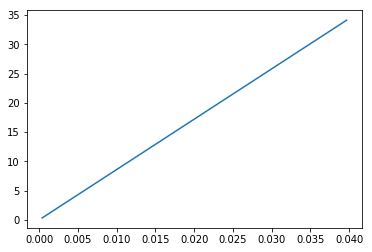

In [11]:
delta = [0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 0.3, 0.5, 0.7, 0.9, 1.]
perturb = np.array([1.,-1.,1.,-1.]).reshape((-1,1))

error_b = [0.]*len(delta)
error_x = [0.]*len(delta)


norm_b = np.linalg.norm(b)
norm_x = np.linalg.norm(x)

for i, d in enumerate(delta):
    error_b[i] = np.linalg.norm( d * perturb ) / norm_b
    xi = np.linalg.solve(A, b+d*perturb )
    error_x[i] = np.linalg.norm( x - xi ) / norm_x


import matplotlib.pyplot as plt
%matplotlib inline
plt.plot( error_b, error_x )




### Améliorer le conditionnement
On peut améliorer le conditionnement d'un problème en réalisant une mise à l'échelle.  
On utilise pour cela une matrice de scaling $\mathbf{W}$ diagonale telle que :

$$ \text{cond} \left( \mathbf{W}\cdot \mathbf{A} \cdot \mathbf{W} \right) < \text{cond} \left(  \mathbf{A} \right)  $$

On peut par exemple définir la matrice de scaling comme :

$$ \left( \mathbf{W} \right)_{ii} = \frac{1}{A_{ii}}\,,\;\; \text{si} \; A_{ii} \neq 0 $$


## Quelques mots sur la compléxité algorithmique


### La compléxité d'un algorithme
Problématique :
Comment évaluer les performances d'un algorithme ? 
Solution 1  :
Je l'implémente et je mesure le temps 
Problème :
Les performances dépendent alors de la configuration de l'ordinateur

Il faut donc une métrique *indépendante* de la machine.  
D'où la notion de **compléxité** :

Si je donne à mon algorithme une entrée de taille N, quel est l'ordre de grandeur en fonction de N
du nombre d'opération que je vais effectuer ?"

On note la compléxité $T(N)$


### Exemple de complexité

* Faire la somme de tous les termes d'une liste

$$ T(N) = (N-1) \text{ additions} = O(N) $$

* Faire une moyenne pondérée

$$ T(N) = N \text{ multiplications} + (N-1) \text{ additions} = 2N - 1 = O(N) $$

* Trier une liste :

  - Tri à bulle : $T(N) = O(N^2)$
  - Tri rapide  : $T(N) = O(N \log N)$

* Produit Matrice-Vecteur 

$$ y_i = \displaystyle\sum_{k=1}^{N} M_{ik} x_{k} \;\; \Rightarrow T(N) = O( N^2 ) $$

### Pour la résolution des systèmes linéaires

Résolution d'un système triangulaire :

$$ T(N) = O(N^2) $$

Pivot de Gauss :

$$ T(N) = N^3  $$

Décomposition LU :

$$ T(N)= \frac{2}{3} N^3   $$

Décomposition de Cholesky :

$n^3/6$ additions+multiplications, $n(n-1)/2$ divisions, $n$ racines carrés

$$ T(N) = O(n^3)$$


## Le cas particulier de nos matrices
Il ne faut pas oublier que les systèmes que l'on cherche à résoudre ne sont pas quelconques ils proviennent d'une formulation éléments finis. Qu'est ce que cela implique me répondrez vous. Beaucoup de choses... Tout d'abord le fait que l'on utilise une discrétisation éléments finis implique que nos matrices sont nécéssairement creuses, i.e. elles comprennent un grand nombre de valeurs nulles. Cela vient du fait que les fonctions de forme utilisées dans la méthode des éléments finis sont à support compact. 




### Les matrices sparses

Des méthodes ont été mise en place pour tirer parti du fait qu'il y a de nombreux zéros dans nos matrices  
Il s'agit des formats de stockage dits **sparse**  
L'idée :

**Ne stocker que les valeurs non nulles de la matrices**

Différents formats : COO, CSR, CSC

On peut alors tirer parti de ces formats de stockage pour réduire la complexité des algorithmes d'algèbre linéaire

Par exemple un produit matrice-vecteur en sparse est de complexité :

$$ T(N) = O(N\cdot \omega ) $$

Avec $\omega$ la largeur de bande de la matrice


## Exercice --- Système masses-ressorts

L'objectif est de déterminer par une approche matricielle la résponse du système à un effort $F$. 

La formulation du problème doit donc se ramener à la résolution d'un problème de la forme 

$$ \mathbf{K} \cdot \mathbf{u} = \mathbf{F}$$ 

Avec $\mathbf{K} \in \mathbb{R}^{M\times M}$, $\mathbf{u} \in \mathbb{R}^{M}$, $\mathbf{F} \in \mathbb{R}^{M}$ et $M$ le nombre de points du système. 

Pour cela on rappel que l'énergie potentielle du système peut s'exprimer de la forme suivante : 

$$ E_p = \frac{1}{2} \sum_{i=1}^{N} \left( u_{i,1} - u_{i,0} \right)\cdot  k_{i} \cdot \left( u_{i,1} - u_{i,0} \right) $$

Avec $u_{i,0}$ le déplacement du premier noeuds d'attache du $i$-ème ressort et $u_{i,1}$ le déplacement du second noeud d'attache du $i$-ème ressort.

Cette énergie potentielle peut s'écrire sous la forme matricielle suivante : 

$$ E_p = \mathbf{U}^T \cdot \mathbf{K} \cdot \mathbf{U} $$ 

En utilisant alors le théorème de l'énergie potentielle nous pouvons écrire que 

$$ \mathbf{K}\cdot \mathbf{U} = \mathbf{F} $$

**Question 1 :** 


A partir de l'expression de l'énergie potentielle d'un ressort définir la matrice de rigidité élémentaire. 

**Question 2 :** 

Utiliser la matrice de rigidité d'un ressort pour construire la matrice $\mathbf{K}$ globale. Pour cela utiliser la notion de table de connectivité. Pour rappel la table de connectivité est une liste $L$ telle que le $i$-ème élément de $L$ est le doublet des indices des points d'attache du ressort. 

**Question 3 :**

Construire le second membre $F$. 



**Question 4 :** 
    
Résoudre le système linéaire 

**Bonus :** 

En utilisant matplotlib, visualiser le profil de la matrice $\mathbf{K}$:  

```python 
import matplotlib.pyplot as plt 
plt.imshow( K ) 
plt.colorbar()
plt.show()
```

Que peut-on en conclure ? Quelle piste d'amélioration est envisageable pour accélérer la résolution du problème ? 